# Fit Ridge Regression
This notebook shows how to fit ridge regression so as to optimize leave-one-out cross-validation.

See [Optimizing Approximate Leave-one-out Cross-validation to Tune Hyperparameters](https://arxiv.org/abs/2011.10218) for details.

## Import Dependencies

In [1]:
library(PeakEngines)

## Load Data Set

In [2]:
data(longley)
df <- longley
indexes <- which(!names(df) %in% c("Employed"))
df[,indexes] <- scale(df[,indexes])

## Fit Ridge Regression

In [3]:
fit <- glmAlo(Employed ~ ., data=df, family=gaussian)
lambda <- fit$lambda

## Verify Hyperparameters
Plot leave-one-out cross-validation to verify the hyperparameters approximately minimized it.

In [4]:
fitRidge <- function(x, y, lambda) {
  # Note: assume the columns of x have zero mean
  ym = mean(y)
  y <- y - ym
  A <- crossprod(x)
  diag(A) <- diag(A) + 2*lambda
  z <- crossprod(x, y)
  b <- solve(A, z)
  list(intercept=ym, coef=b)
}

In [5]:
computeLo <- function(lambda, df) {
  nobs <- nrow(df)
  x <- model.matrix(Employed ~ ., df)[,-1]
  y <- df$Employed
  result <- 0
  for (i in 1:nobs) {
    x_test <- x[c(i),]
    x_train <- x[-i,]
    y_test <- y[c(i)]
    y_train <- y[-i]
    fit <- fitRidge(x_train, y_train, lambda)
    pred <- x_test %*% fit$coef + fit$intercept
    result <- result + (pred[1] - y[i])**2
  }
  result / nobs
}

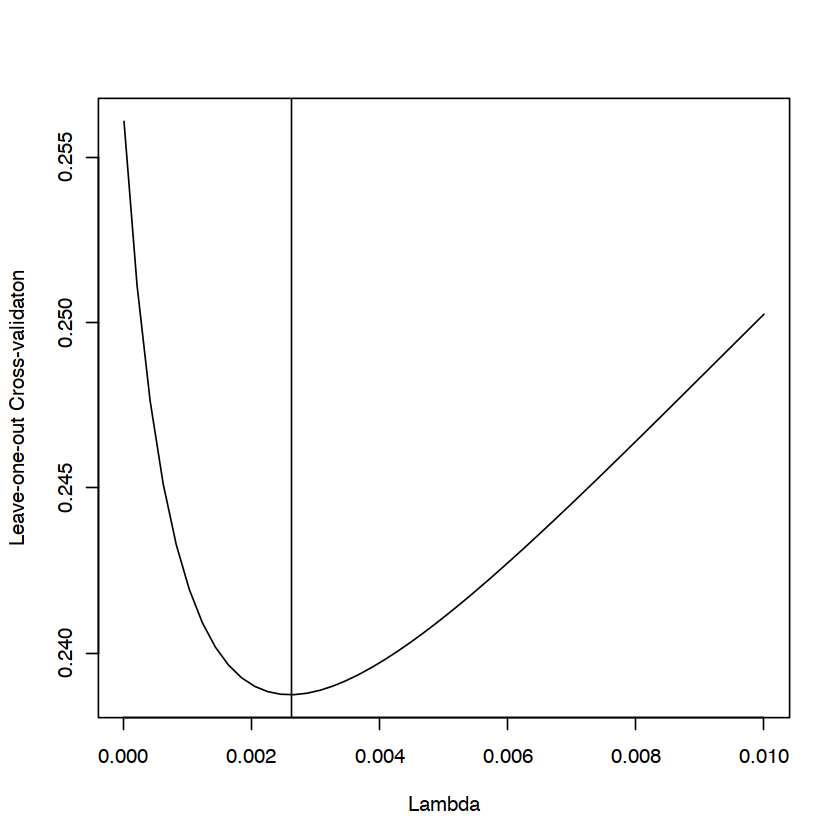

In [6]:
f <- function(lambdas) {
    result <- rep(0, 10)
    for (i in 1:length(lambdas)) {
        result[i] <- computeLo(lambdas[i], df)
    }
    result
}
curve(f(x), from=0.00001, to=0.01,  n=50, 
      xlab="Lambda", 
      ylab="Leave-one-out Cross-validaton")
abline(v = lambda)